In [1]:
import pandas_datareader.data as web
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Merlin 
### 30 junio 14

In [2]:
# Obtenemos dataframe por ticker desde yahoo finance, start date y stop date
merlin = web.DataReader('MRL.MC',  'yahoo', '2018-10-01', '2022-05-31')
merlin.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-25,10.82,10.52,10.75,10.60,590072.0,9.838506
2022-05-26,10.68,10.55,10.67,10.60,835930.0,9.838506
2022-05-27,10.69,10.49,10.69,10.64,1106267.0,9.875632
2022-05-30,10.80,10.61,10.71,10.64,456025.0,9.875632
2022-05-31,10.64,10.48,10.56,10.53,1297679.0,9.773534


In [3]:
# Convertimos el indice en columna para poder modificarlo
merlin=merlin.reset_index()

In [4]:
# Pasamos date a str
merlin['Date']=merlin['Date'].astype(str)
merlin['Date'].head()

0    2018-10-01
1    2018-10-02
2    2018-10-03
3    2018-10-04
4    2018-10-05
Name: Date, dtype: object

In [5]:
# Eliminamos los dias
merlin['Date']=merlin['Date'].str.slice_replace(7,repl='')
merlin['Date'].head()

0    2018-10
1    2018-10
2    2018-10
3    2018-10
4    2018-10
Name: Date, dtype: object

In [6]:
# Agrupamos por meses y sacamos la media de cada columna
merlin=merlin.groupby('Date').aggregate([np.mean])
merlin.head()

,High,Low,Open,Close,Volume,Adj Close
,mean,mean,mean,mean,mean,mean
Date,,,,,,
2018-10,11.430652,11.217826,11.328696,11.303478,1.436161e+06,9.100840
2018-11,11.248409,11.054545,11.155682,11.142045,1.137758e+06,9.055034
2018-12,11.099474,10.833684,10.975000,10.955526,1.452432e+06,8.903452
2019-01,11.341591,11.150000,11.235227,11.275227,1.132259e+06,9.163270
2019-02,11.448000,11.267000,11.353250,11.333000,1.030770e+06,9.210221


In [7]:
# Añadimos una nueva columna con la variacion de la rentabilidad mensual
merlin['Variación Rentabilidad Mensual (%)']=merlin['Adj Close'].pct_change().multiply(100)
merlin.head()

,High,Low,Open,Close,Volume,Adj Close,Variación Rentabilidad Mensual (%)
,mean,mean,mean,mean,mean,mean,
Date,,,,,,,
2018-10,11.430652,11.217826,11.328696,11.303478,1.436161e+06,9.100840,NaN
2018-11,11.248409,11.054545,11.155682,11.142045,1.137758e+06,9.055034,-0.503312
2018-12,11.099474,10.833684,10.975000,10.955526,1.452432e+06,8.903452,-1.674012
2019-01,11.341591,11.150000,11.235227,11.275227,1.132259e+06,9.163270,2.918170
2019-02,11.448000,11.267000,11.353250,11.333000,1.030770e+06,9.210221,0.512390


In [8]:
# Añadimos una columna con la variacion acumulada
merlin['Variación Rentabilidad Mensual Acumulada (%)']= merlin['Variación Rentabilidad Mensual (%)'].cumsum()
merlin.head()

,High,Low,Open,Close,Volume,Adj Close,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
,mean,mean,mean,mean,mean,mean,,
Date,,,,,,,,
2018-10,11.430652,11.217826,11.328696,11.303478,1.436161e+06,9.100840,NaN,NaN
2018-11,11.248409,11.054545,11.155682,11.142045,1.137758e+06,9.055034,-0.503312,-0.503312
2018-12,11.099474,10.833684,10.975000,10.955526,1.452432e+06,8.903452,-1.674012,-2.177324
2019-01,11.341591,11.150000,11.235227,11.275227,1.132259e+06,9.163270,2.918170,0.740846
2019-02,11.448000,11.267000,11.353250,11.333000,1.030770e+06,9.210221,0.512390,1.253236


In [9]:
# Seleccionamos solo las columnas que queremos
merlin=merlin[['Adj Close','Variación Rentabilidad Mensual (%)','Variación Rentabilidad Mensual Acumulada (%)']]
merlin.head()

,Adj Close,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
,mean,,
Date,,,
2018-10,9.100840,NaN,NaN
2018-11,9.055034,-0.503312,-0.503312
2018-12,8.903452,-1.674012,-2.177324
2019-01,9.163270,2.918170,0.740846
2019-02,9.210221,0.512390,1.253236


In [10]:
# Unificamos los nombres de cada columna
merlin.columns=['Adj Close Mensual','Variación Rentabilidad Mensual (%)','Variación Rentabilidad Mensual Acumulada (%)']
merlin.head()

,Adj Close Mensual,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
Date,,,
2018-10,9.100840,NaN,NaN
2018-11,9.055034,-0.503312,-0.503312
2018-12,8.903452,-1.674012,-2.177324
2019-01,9.163270,2.918170,0.740846
2019-02,9.210221,0.512390,1.253236


In [11]:
print(merlin.shape)
merlin.head()

(44, 3)


,Adj Close Mensual,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
Date,,,
2018-10,9.100840,NaN,NaN
2018-11,9.055034,-0.503312,-0.503312
2018-12,8.903452,-1.674012,-2.177324
2019-01,9.163270,2.918170,0.740846
2019-02,9.210221,0.512390,1.253236


In [12]:
merlin_VA=merlin[['Variación Rentabilidad Mensual Acumulada (%)']]
merlin_VA=merlin_VA.drop(merlin_VA.index[:1])
merlin_VA.head()

,Variación Rentabilidad Mensual Acumulada (%)
Date,
2018-11,-0.503312
2018-12,-2.177324
2019-01,0.740846
2019-02,1.253236
2019-03,2.693192


# Colonial
### 01 junio 2002

In [13]:
def var_mensual_acumulada(n_empresa, ticker, fecha_inicio, fecha_fin):
    n_empresa = web.DataReader(ticker, 'yahoo', fecha_inicio, fecha_fin)
    n_empresa=n_empresa.reset_index()
    n_empresa['Date']=n_empresa['Date'].astype(str)
    n_empresa['Date']=n_empresa['Date'].str.slice_replace(7,repl='')
    n_empresa=n_empresa.groupby('Date').aggregate([np.mean])
    n_empresa['Variación Rentabilidad Mensual (%)']=n_empresa['Adj Close'].pct_change().multiply(100)
    n_empresa['Variación Rentabilidad Mensual Acumulada (%)']= n_empresa['Variación Rentabilidad Mensual (%)'].cumsum()
    n_empresa=n_empresa[['Adj Close','Variación Rentabilidad Mensual (%)','Variación Rentabilidad Mensual Acumulada (%)']]
    n_empresa.columns=['Adj Close Mensual','Variación Rentabilidad Mensual (%)','Variación Rentabilidad Mensual Acumulada (%)']
    return n_empresa

In [14]:
colonial=var_mensual_acumulada('colonial', 'COL.MC' , '2018-10-01', '2022-09-26')
colonial.head()

,Adj Close Mensual,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
Date,,,
2018-10,7.851657,NaN,NaN
2018-11,7.874529,0.291301,0.291301
2018-12,7.592499,-3.581555,-3.290254
2019-01,7.752882,2.112392,-1.177862
2019-02,7.877906,1.612617,0.434755


In [15]:
colonial_VA=colonial[['Variación Rentabilidad Mensual Acumulada (%)']]
colonial_VA=colonial_VA.drop(colonial_VA.index[:1])
colonial_VA.head()

,Variación Rentabilidad Mensual Acumulada (%)
Date,
2018-11,0.291301
2018-12,-3.290254
2019-01,-1.177862
2019-02,0.434755
2019-03,4.126495


# Lar
### 3 marzo 2014

In [16]:
lar=var_mensual_acumulada('lar', 'LRE.MC' , '2018-10-01', '2022-09-26')
lar.head()

,Adj Close Mensual,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
Date,,,
2018-10,6.599950,NaN,NaN
2018-11,6.633154,0.503097,0.503097
2018-12,6.168482,-7.005296,-6.502199
2019-01,6.140885,-0.447375,-6.949574
2019-02,6.421143,4.563804,-2.385770


In [17]:
lar_VA=lar[['Variación Rentabilidad Mensual Acumulada (%)']]
lar_VA=lar_VA.drop(lar_VA.index[:1])
lar_VA.head()

,Variación Rentabilidad Mensual Acumulada (%)
Date,
2018-11,0.503097
2018-12,-6.502199
2019-01,-6.949574
2019-02,-2.385770
2019-03,-8.379700


# Arima
### 22 octubre 2018

In [18]:
arima=var_mensual_acumulada('arima', 'ARM.MC' , '2018-10-01', '2022-09-26')
arima.head()

,Adj Close Mensual,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
Date,,,
2018-10,9.371429,NaN,NaN
2018-11,9.350000,-0.228660,-0.228660
2018-12,9.238947,-1.187728,-1.416388
2019-01,9.143636,-1.031622,-2.448010
2019-02,9.321000,1.939751,-0.508259


In [19]:
arima_VA=arima[['Variación Rentabilidad Mensual Acumulada (%)']]
arima_VA=arima_VA.drop(arima_VA.index[:1])
arima.head()

,Adj Close Mensual,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
Date,,,
2018-10,9.371429,NaN,NaN
2018-11,9.350000,-0.228660,-0.228660
2018-12,9.238947,-1.187728,-1.416388
2019-01,9.143636,-1.031622,-2.448010
2019-02,9.321000,1.939751,-0.508259


# Olimpo, Prevision Sanitaia, Galil Capital, Meridia, Albirana, Adriano Care,

# IBEX35

In [20]:
ibex35=var_mensual_acumulada('ibex35', '^IBEX' , '2018-10-01', '2022-09-26')
ibex35.head()

,Adj Close Mensual,Variación Rentabilidad Mensual (%),Variación Rentabilidad Mensual Acumulada (%)
Date,,,
2018-10,9008.617442,NaN,NaN
2018-11,9045.345481,0.407699,0.407699
2018-12,8747.821032,-3.289255,-2.881556
2019-01,8928.013494,2.059855,-0.821700
2019-02,9087.495068,1.786305,0.964605


In [21]:
ibex35_VA=ibex35[['Variación Rentabilidad Mensual Acumulada (%)']]
ibex35_VA=ibex35_VA.drop(ibex35_VA.index[:1])
ibex35_VA.head()

,Variación Rentabilidad Mensual Acumulada (%)
Date,
2018-11,0.407699
2018-12,-2.881556
2019-01,-0.821700
2019-02,0.964605
2019-03,2.836567


# IPC

In [22]:
#Leemos el csv y lo giramos (de los primeros a los últimos años), url ---> https://www.ine.es/consul/serie.do?d=true&s=IPC251855 ---> Csv (separado por ;), 100, Columnas
ipc = pd.read_csv('IPC_ES_2022M08.csv',sep=';')
ipc=ipc.loc[::-1]
ipc.head()

,Variable1,Valor1,Variable2,Valor2,Variable3,Valor3,PERIODO,VALOR
99,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2014M05,"0,0"
98,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2014M06,"0,0"
97,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2014M07,"-0,9"
96,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2014M08,"0,2"
95,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2014M09,"0,2"


In [23]:
#Reemplazamos la coma por un punto y convertimos en float
ipc['VALOR']=ipc['VALOR'].str.replace(',','.').astype(float)
ipc['VALOR']

99    0.0
98    0.0
97   -0.9
96    0.2
95    0.2
     ... 
4    -0.2
3     0.8
2     1.9
1    -0.3
0     0.3
Name: VALOR, Length: 100, dtype: float64

In [24]:
#Reemplazamos la M por un guión y convertimos en float
ipc['PERIODO']=ipc['PERIODO'].str.replace('M','-')
ipc['PERIODO']

99    2014-05
98    2014-06
97    2014-07
96    2014-08
95    2014-09
       ...   
4     2022-04
3     2022-05
2     2022-06
1     2022-07
0     2022-08
Name: PERIODO, Length: 100, dtype: object

In [25]:
#Seleccionamos desde el punto de partida que nos interesa
ipc=ipc.iloc[54:100]
ipc.head()

,Variable1,Valor1,Variable2,Valor2,Variable3,Valor3,PERIODO,VALOR
45,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2018-11,-0.1
44,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2018-12,-0.4
43,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2019-01,-1.3
42,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2019-02,0.2
41,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2019-03,0.4


In [26]:
ipc.tail()

,Variable1,Valor1,Variable2,Valor2,Variable3,Valor3,PERIODO,VALOR
4,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2022-04,-0.2
3,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2022-05,0.8
2,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2022-06,1.9
1,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2022-07,-0.3
0,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2022-08,0.3


In [27]:
#Creamos una nueva columna con la variacion acumulada
ipc['Valor Acumulado Mensual']= ipc['VALOR'].cumsum()
ipc.head()

,Variable1,Valor1,Variable2,Valor2,Variable3,Valor3,PERIODO,VALOR,Valor Acumulado Mensual
45,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2018-11,-0.1,-0.1
44,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2018-12,-0.4,-0.5
43,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2019-01,-1.3,-1.8
42,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2019-02,0.2,-1.6
41,Tipo de dato,Variación mensual,Total Nacional,Total Nacional,Grupos ECOICOP,Índice general,2019-03,0.4,-1.2


In [28]:
#Seleccionamos las columnas que queremos
ipc=ipc[['PERIODO','VALOR','Valor Acumulado Mensual']]
ipc.head()

,PERIODO,VALOR,Valor Acumulado Mensual
45,2018-11,-0.1,-0.1
44,2018-12,-0.4,-0.5
43,2019-01,-1.3,-1.8
42,2019-02,0.2,-1.6
41,2019-03,0.4,-1.2


In [29]:
#Reombramos columna
ipc.rename(columns={'PERIODO':'Date'}, inplace = True)
ipc.head()

,Date,VALOR,Valor Acumulado Mensual
45,2018-11,-0.1,-0.1
44,2018-12,-0.4,-0.5
43,2019-01,-1.3,-1.8
42,2019-02,0.2,-1.6
41,2019-03,0.4,-1.2


In [30]:
#definimos la columna de fechas como indice
ipc=ipc.set_index('Date')
ipc.head()

,VALOR,Valor Acumulado Mensual
Date,,
2018-11,-0.1,-0.1
2018-12,-0.4,-0.5
2019-01,-1.3,-1.8
2019-02,0.2,-1.6
2019-03,0.4,-1.2


In [31]:
#Renombramos columna
ipc.rename(columns={'VALOR':'Var'}, inplace = True)
ipc.tail()

,Var,Valor Acumulado Mensual
Date,,
2022-04,-0.2,9.4
2022-05,0.8,10.2
2022-06,1.9,12.1
2022-07,-0.3,11.8
2022-08,0.3,12.1


In [32]:
ipc_VA=ipc[['Valor Acumulado Mensual']]
#ipc_VA=ipc_VA.drop(ipc_VA.index[:7])
ipc_VA.head()

,Valor Acumulado Mensual
Date,
2018-11,-0.1
2018-12,-0.5
2019-01,-1.8
2019-02,-1.6
2019-03,-1.2


# Correlacion


In [33]:
all_data_col = pd.concat([ipc_VA,ibex35_VA,merlin_VA,colonial_VA,arima_VA,lar_VA], axis=1)
all_data_col.head()

,Valor Acumulado Mensual,Variación Rentabilidad Mensual Acumulada (%),Variación Rentabilidad Mensual Acumulada (%),Variación Rentabilidad Mensual Acumulada (%),Variación Rentabilidad Mensual Acumulada (%),Variación Rentabilidad Mensual Acumulada (%)
Date,,,,,,
2018-11,-0.1,0.407699,-0.503312,0.291301,-0.228660,0.503097
2018-12,-0.5,-2.881556,-2.177324,-3.290254,-1.416388,-6.502199
2019-01,-1.8,-0.821700,0.740846,-1.177862,-2.448010,-6.949574
2019-02,-1.6,0.964605,1.253236,0.434755,-0.508259,-2.385770
2019-03,-1.2,2.836567,2.693192,4.126495,3.578261,-8.379700


In [34]:
all_data_col.columns=['IPC Var. Acumulada','IBEX35 Var. Acumulada','Merlin Var. Acumulada','Colonial Var. Acumulada','Arima Var. Acumulada','Lar Var. Acumulada']
all_data_col.head()

,IPC Var. Acumulada,IBEX35 Var. Acumulada,Merlin Var. Acumulada,Colonial Var. Acumulada,Arima Var. Acumulada,Lar Var. Acumulada
Date,,,,,,
2018-11,-0.1,0.407699,-0.503312,0.291301,-0.228660,0.503097
2018-12,-0.5,-2.881556,-2.177324,-3.290254,-1.416388,-6.502199
2019-01,-1.8,-0.821700,0.740846,-1.177862,-2.448010,-6.949574
2019-02,-1.6,0.964605,1.253236,0.434755,-0.508259,-2.385770
2019-03,-1.2,2.836567,2.693192,4.126495,3.578261,-8.379700


In [35]:
df_corr = all_data_col.corr()
df_corr

,IPC Var. Acumulada,IBEX35 Var. Acumulada,Merlin Var. Acumulada,Colonial Var. Acumulada,Arima Var. Acumulada,Lar Var. Acumulada
IPC Var. Acumulada,1.000000,0.259989,0.408929,-0.249710,-0.264588,0.112328
IBEX35 Var. Acumulada,0.259989,1.000000,0.850646,0.579398,0.476303,0.899114
Merlin Var. Acumulada,0.408929,0.850646,1.000000,0.741498,0.681992,0.855754
Colonial Var. Acumulada,-0.249710,0.579398,0.741498,1.000000,0.881590,0.599744
Arima Var. Acumulada,-0.264588,0.476303,0.681992,0.881590,1.000000,0.501766
Lar Var. Acumulada,0.112328,0.899114,0.855754,0.599744,0.501766,1.000000


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

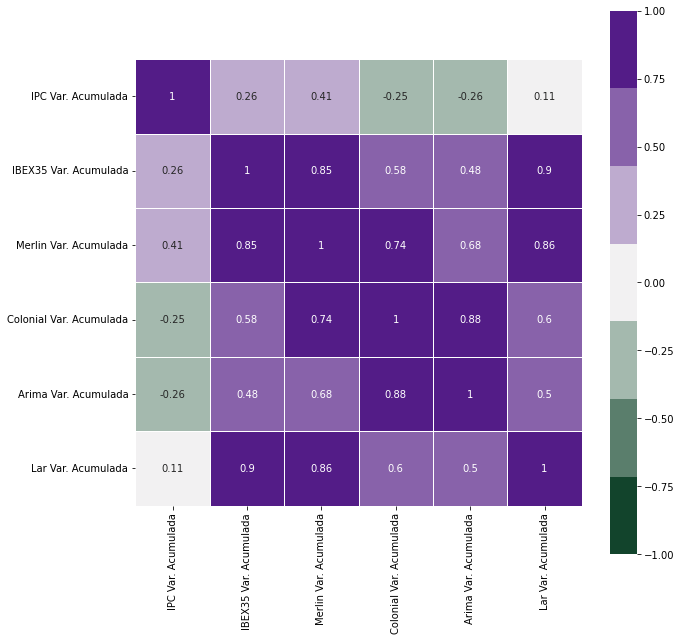

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(all_data_col.corr(),
vmin=-1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
annot = True,
square = True,
linewidth = .5);

In [38]:
import plotly.figure_factory as ff
import plotly.express as px
from textwrap import wrap
from plotly.offline import iplot

named_colorscales = px.colors.named_colorscales()
print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
dense       gray        haline      ice         matter      solar       speed       tempo
thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
tealrose    temps       tropic      balance     curl        delta       oxy         edge
hsv     

In [39]:
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='peach'
)

fig.update_layout(
    title_text="Correlación de la Variación Mensual entre las SOCIMI, el IBEX35 y el IPC"
)

fig.show()

In [40]:
all_data_col_lines=all_data_col.reset_index()
all_data_col_lines.head()


,Date,IPC Var. Acumulada,IBEX35 Var. Acumulada,Merlin Var. Acumulada,Colonial Var. Acumulada,Arima Var. Acumulada,Lar Var. Acumulada
0,2018-11,-0.1,0.407699,-0.503312,0.291301,-0.228660,0.503097
1,2018-12,-0.5,-2.881556,-2.177324,-3.290254,-1.416388,-6.502199
2,2019-01,-1.8,-0.821700,0.740846,-1.177862,-2.448010,-6.949574
3,2019-02,-1.6,0.964605,1.253236,0.434755,-0.508259,-2.385770
4,2019-03,-1.2,2.836567,2.693192,4.126495,3.578261,-8.379700


In [46]:
df = all_data_col_lines
#import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

#Ajustamos los ejes
fig.update_yaxes(range=[-60,60], secondary_y=False)
fig.update_yaxes(range=[-15,15], secondary_y=True)

fig.add_trace(
    go.Scatter(
    x = df["Date"],
    y = df["IPC Var. Acumulada"],
    name = "IPC Var. Acumulada",
    mode = "lines+markers",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)')),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(
    x = df["Date"],
    y = df["IBEX35 Var. Acumulada"],
    name = "IBEX35 Var. Acumulada",
    mode = "lines+markers",
    marker = dict(color = "rgba(30, 26, 255, 0.8)")),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
    x = df["Date"],
    y = df["Merlin Var. Acumulada"],
    name = "Merlin Var. Acumulada",
    mode = "lines+markers",
    marker = dict(color = "rgba(255, 20, 5, 0.8)")),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
    x = df["Date"],
    y = df["Colonial Var. Acumulada"],
    name = "Colonial Var. Acumulada",
    mode = "lines+markers",
    marker = dict(color = "rgba(255, 200, 90, 0.8)")),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
    x = df["Date"],
    y = df["Lar Var. Acumulada"],
    name = "Lar Var. Acumulada",
    mode = "lines+markers",
    marker = dict(color = "rgba(230, 130, 238, 0.8)")),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
    x = df["Date"],
    y = df["Arima Var. Acumulada"],
    name = "Arima Var. Acumulada",
    mode = "lines+markers",
    marker = dict(color = "rgba(251, 118, 38, 0.8)")),
    secondary_y=False,
)

fig.update_layout(
    title_text="Variación Acumulada de las principales SOCIMI vs Variación Acumulada del IBX35 y del IPC"
)

fig.update_xaxes(title_text="Meses desde 11/2018 a 05/2022")

fig.update_yaxes(title_text="Escala SOCIMIs e IBEX35", secondary_y=False)
fig.update_yaxes(title_text="Escala IPC", secondary_y=True)

fig.show()